# Quickstart

## Likelihood function and prior distribution

The first step in any analysis is to define the *prior distribution* and *likelihood function*. More precisely, for computational reasons, we require the *logarithm* of the prior probability density function $\log p(\theta)$ and the *logarithm* of the likelihood function $\log \mathcal{L}(\theta)=P(d\vert \theta)$.

In [1]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 10

# Define our 10-D correlated multivariate normal log-likelihood.
C = np.identity(ndim)
C[C==0] = 0.95
Cinv = np.linalg.inv(C)
lnorm = -0.5 * (np.log(2 * np.pi) * ndim + np.log(np.linalg.det(C)))

def loglike(x):
    return -0.5 * np.dot(x, np.dot(Cinv, x)) + lnorm

# Define our uniform prior.
def logprior(x):
    if np.any(x < -10.0) or np.any(x > 10.0):
        return -np.inf
    else:
        return 0.0

## Preconditioned Monte Carlo sampling

The next step is to initialise the *PMC sampler* using ``pocoMC`` and configure it for our analysis.

In [2]:
# import pocoMC
import pocomc as pc

# Number of particles to use
nparticles = 1000

# Initialise sampler
sampler = pc.Sampler(nparticles,
                     ndim,
                     loglikelihood=loglike,
                     logprior=logprior,
                     bounds=None)

/Users/minas/opt/anaconda3/envs/dev-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Finally, once we produce some samples from the prior distribution we can start sampling.

In [3]:
# Initialise particles' positions using samples from the prior (this is very important, other initialisation will not work).
prior_samples = -10.0 + 20.0 * np.random.rand(nparticles, ndim)

# Start sampling
sampler.run(prior_samples)

# We can add more samples at the end
sampler.add_samples(1000)

# Get results
results = sampler.results

Iter: 59it [02:46,  2.82s/it, beta=1, calls=318000, ESS=0.971, logZ=-30.9, accept=0.237, N=5, scale=1.05, corr=0.729]       
Iter: 1it [00:00,  3.90it/s, beta=1, calls=323000, ESS=0.95, logZ=-30.9, accept=0.224, N=5, scale=1.07, corr=0.727]


## Plot results

You can then produce a trace plot and a corner plot of the results.

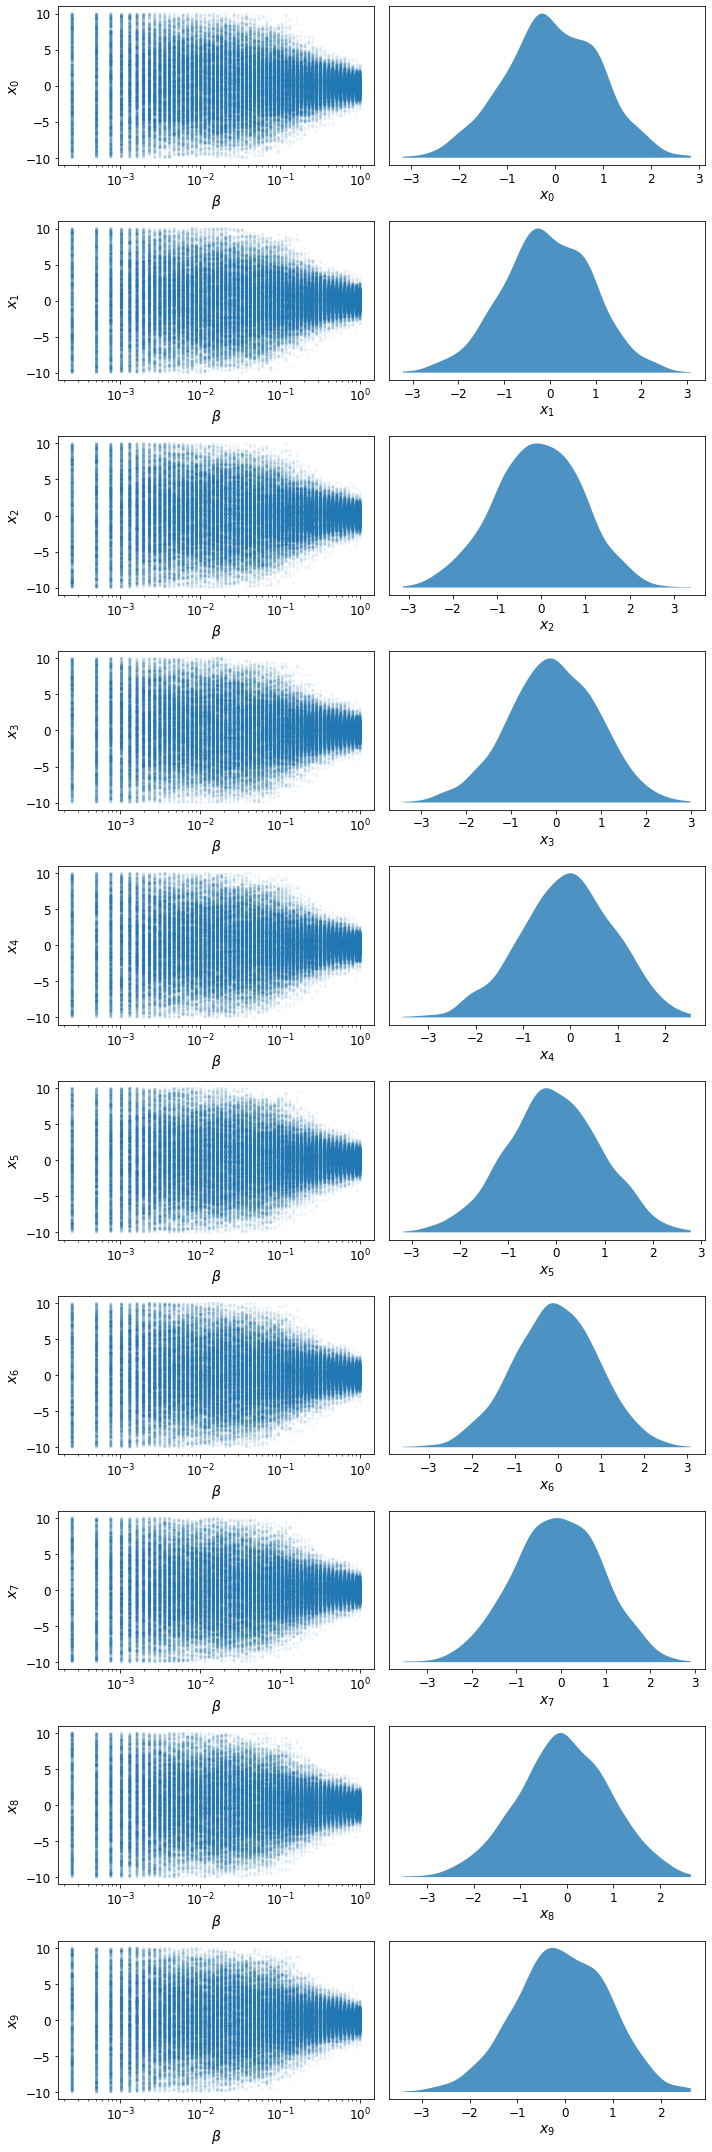

In [4]:
import matplotlib.pyplot as plt

# Trace plot
pc.plotting.trace(results)
plt.show()

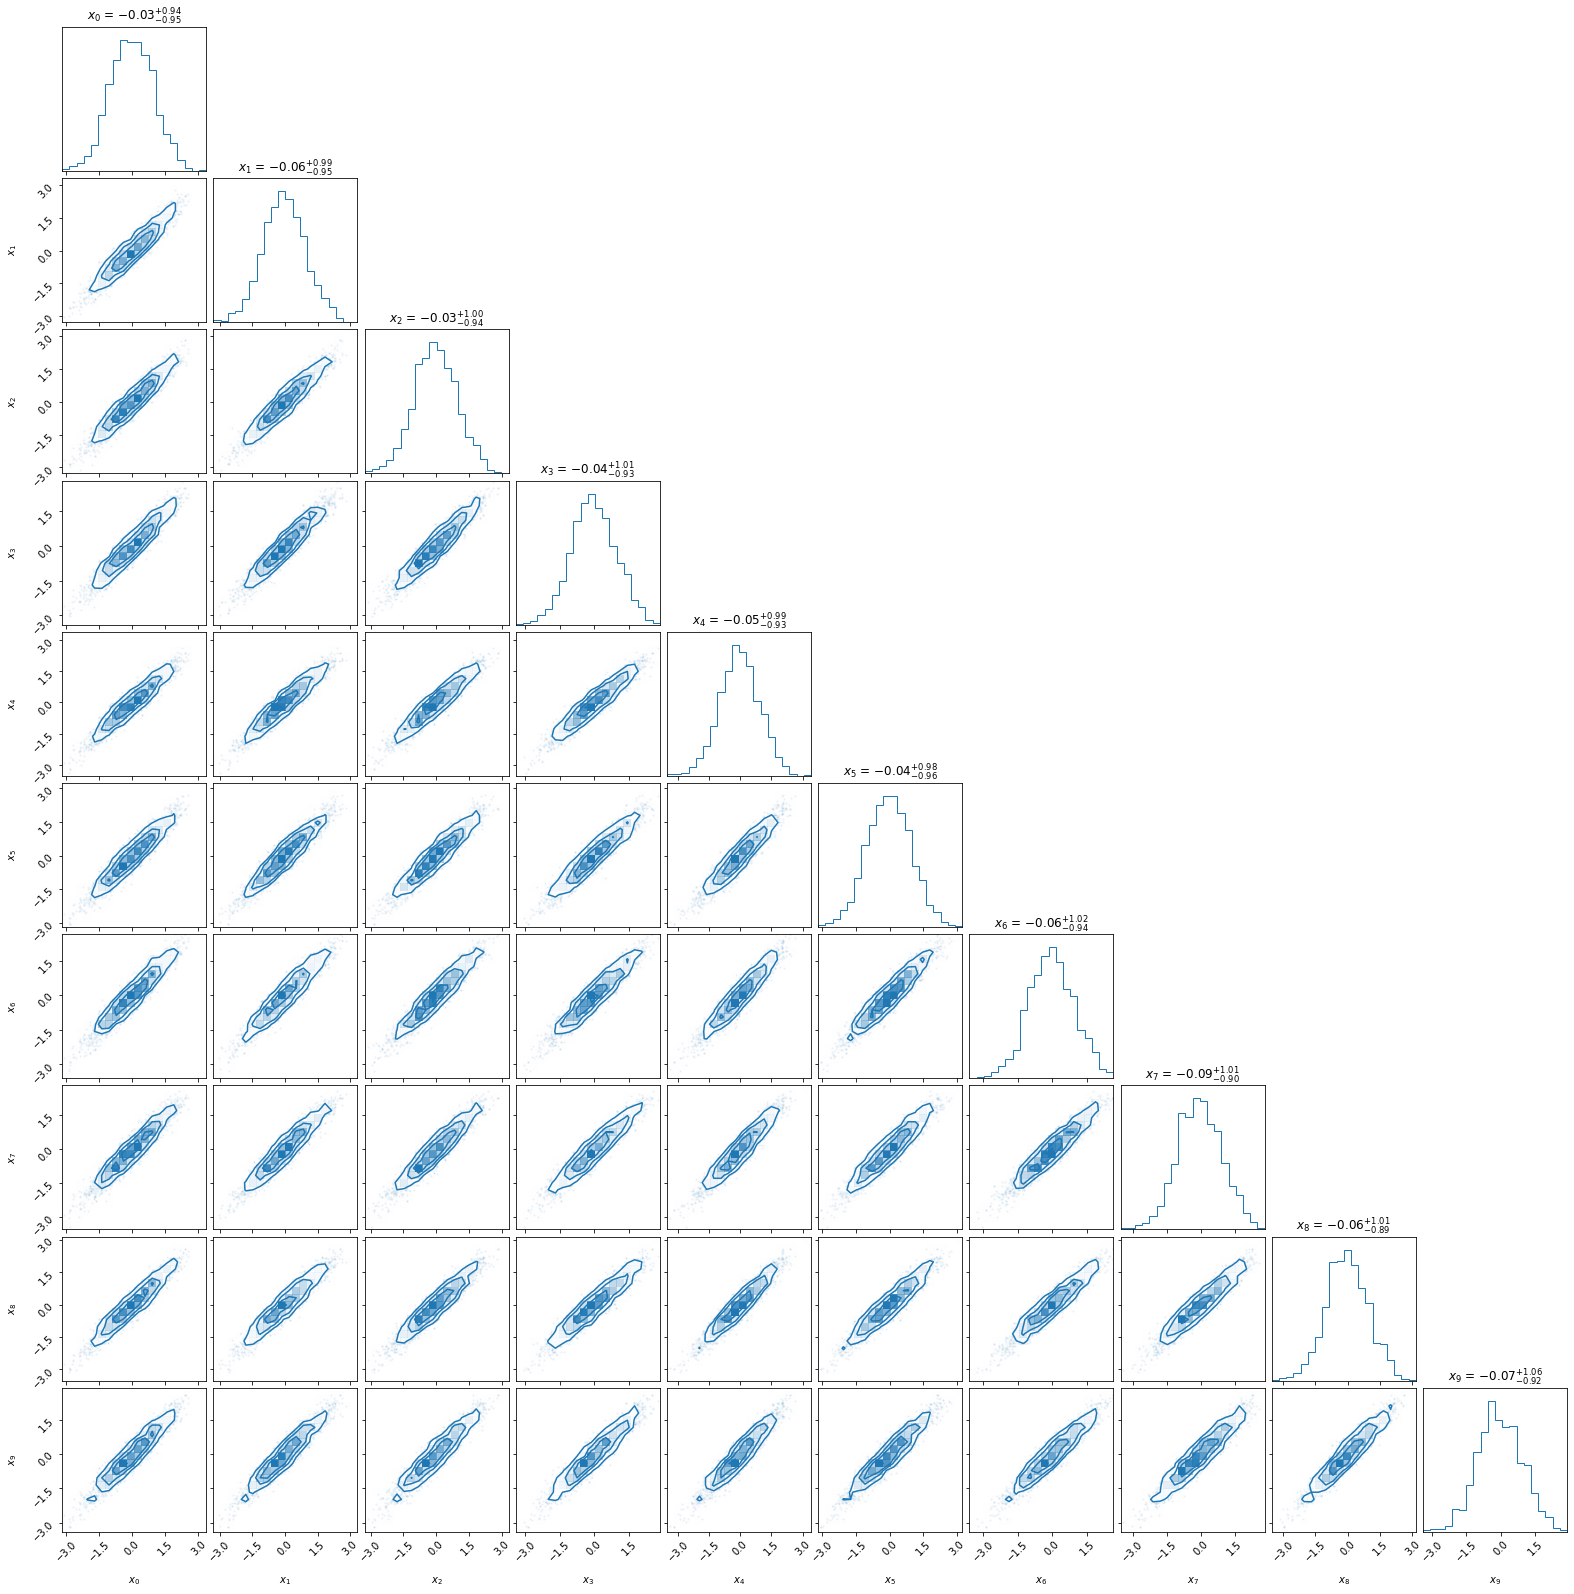

In [5]:
# Corner plot
pc.plotting.corner(results, labels=[r"$x_{%s}$"%i for i in range(ndim)])
plt.show()

## Get results

Furthermore, you can access the results of the analysis using the ``sampler.results`` dictionary.

In [6]:
print(results.keys())

dict_keys(['iter', 'samples', 'posterior_samples', 'logl', 'logw', 'logz', 'ess', 'ncall', 'beta', 'accept', 'scale', 'steps'])
